In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## IMPORTS

In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

ModuleNotFoundError: No module named 'tensorflow'

## CREATING DATAFRAME

In [ ]:
initail_df = pd.read_csv('/kaggle/input/movie-recommendation-system-dataset/Movies Recommendation.csv')
initail_df.head(2)

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas


## DATASET INFO

In [ ]:
initail_df.shape

(4760, 21)

In [ ]:
initail_df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
initail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

**NULL VALUES**

In [ ]:
initail_df.isnull().sum()

Movie_ID                       0
Movie_Title                    0
Movie_Genre                    0
Movie_Language                 0
Movie_Budget                   0
Movie_Popularity               0
Movie_Release_Date             0
Movie_Revenue                  0
Movie_Runtime                  2
Movie_Vote                     0
Movie_Vote_Count               0
Movie_Homepage              3061
Movie_Keywords               387
Movie_Overview                 3
Movie_Production_House         0
Movie_Production_Country       0
Movie_Spoken_Language          0
Movie_Tagline                818
Movie_Cast                    27
Movie_Crew                     0
Movie_Director                22
dtype: int64

# VISUALIZATIONS

In [ ]:
visulaization_df = initail_df.copy()
# visulaization_df.dropna(inplace=True)

In [ ]:
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

### TOP 10 HIGHEST BUGHETS MOVIES

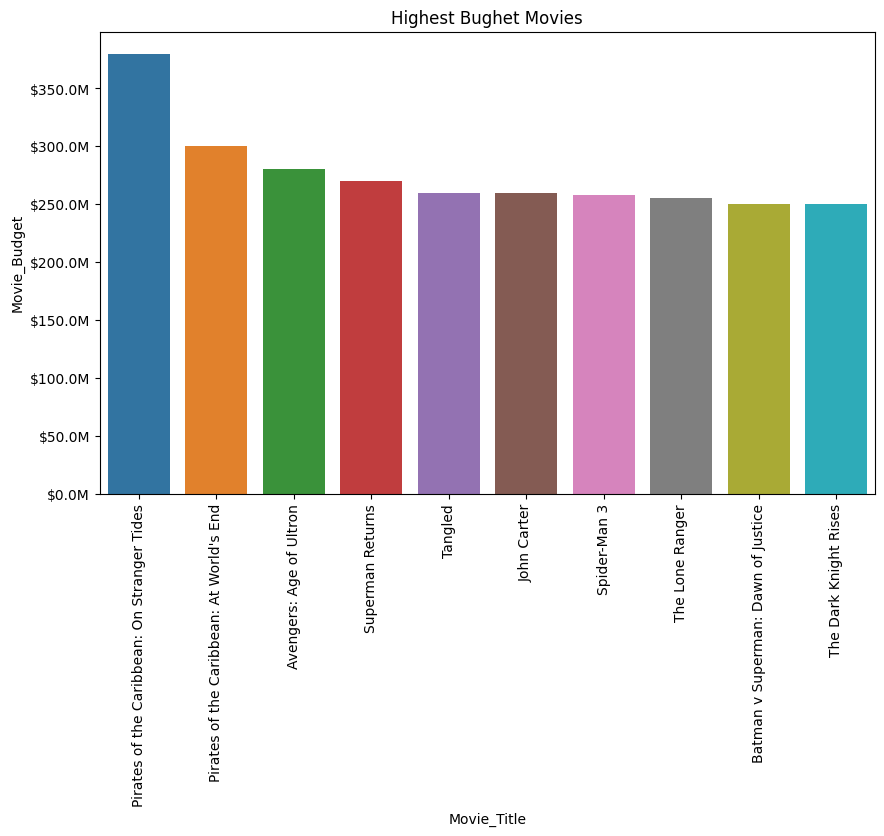

In [ ]:
bughet_sorted_movies = visulaization_df.sort_values(by='Movie_Budget', ascending=False)
top_10_movies = bughet_sorted_movies.iloc[:10]

plt.figure(figsize=(10,6))
ax = sns.barplot(x = 'Movie_Title',
            y = 'Movie_Budget',
            data = top_10_movies)


ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.title('Highest Bughet Movies')
plt.show()

### Top 10 Movies by Revenue

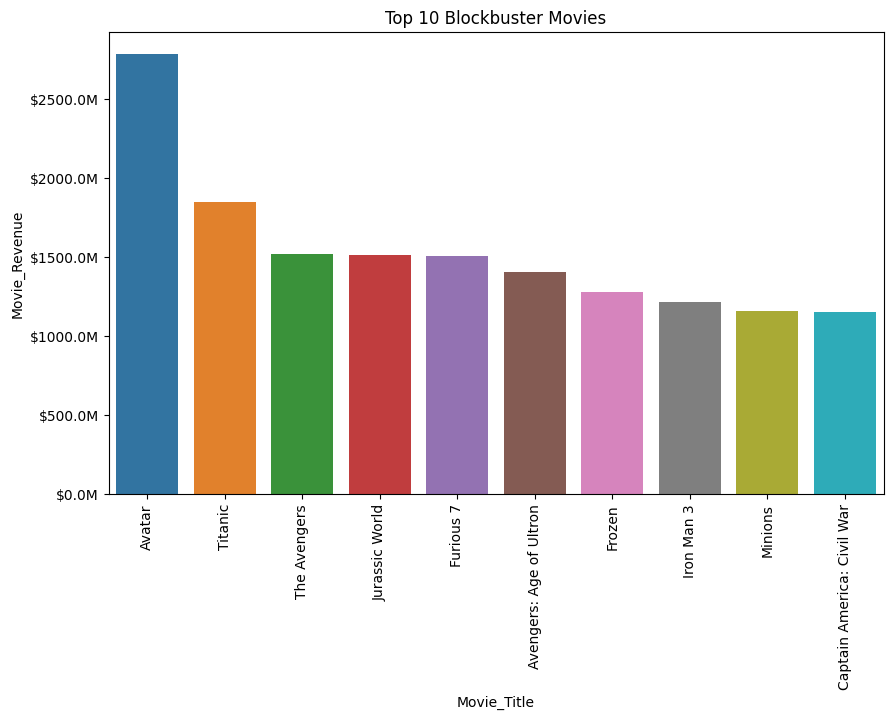

In [ ]:
top_10_movies_revenue = visulaization_df.sort_values(by='Movie_Revenue', ascending=False).iloc[:10]

plt.figure(figsize=(10,6))
ax = sns.barplot(x = 'Movie_Title',
            y = 'Movie_Revenue',
            data = top_10_movies_revenue)

plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(formatter)
plt.title('Top 10 Blockbuster Movies')
plt.show()

### TOP 10 RATING MOVIES

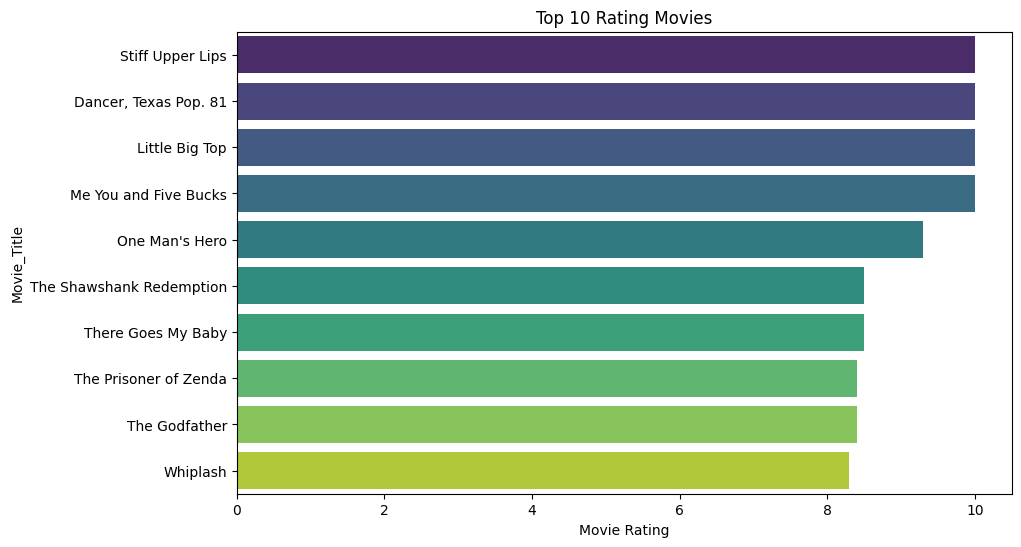

In [ ]:
top_10_movies_rating = visulaization_df.sort_values(by='Movie_Vote', ascending=False)[:10]
top_10_movies_rating
plt.figure(figsize=(10,6))
ax = sns.barplot(x = 'Movie_Vote',
            y = 'Movie_Title',
            data = top_10_movies_rating, palette='viridis')

plt.xlabel('Movie Rating')
plt.title('Top 10 Rating Movies')
plt.show()

### Top Language in Movies

In [ ]:
movie_language_count = visulaization_df.groupby('Movie_Language').size().reset_index(name='Count')
movie_language_count = movie_language_count.sort_values(by='Count', ascending=False)

top_1 = movie_language_count.head(1)
others = movie_language_count.iloc[5:]

others_sum = others['Count'].sum()

other_row = pd.DataFrame({'Movie_Language': ['Others'], 'Count': [others_sum] })
movie_language_count = pd.concat([top_1, other_row], ignore_index=True)

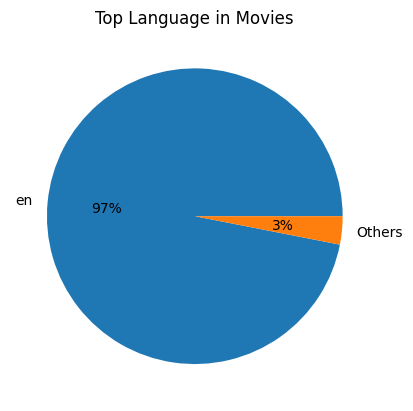

In [ ]:
plt.pie(movie_language_count['Count'], labels=movie_language_count['Movie_Language'],
        autopct='%.0f%%') 
plt.title('Top Language in Movies')
plt.show()

# TRANSFORMING DATA

### DROPPING UNNECESSARY COLUMNS

In [ ]:
feature_cols = ['Movie_Title', 'Movie_Genre', 'Movie_Keywords', 'Movie_Overview', 'Movie_Tagline', 
                'Movie_Cast', 'Movie_Director']

df = initail_df[feature_cols]

### HANDLING NULL VALUES

In [ ]:
df = df[feature_cols].fillna('') 

### Combine all selected features into one

In [ ]:
df['combined_features'] = df['Movie_Genre'] + ' ' + df['Movie_Keywords'] + ' ' + \
                          df['Movie_Overview'] + ' ' + df['Movie_Tagline'] + ' ' + \
                          df['Movie_Cast'] + ' ' + df['Movie_Director']

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])
# print(tfidf_vectorizer.vocabulary_)
# print(tfidf_matrix)

# KNN MODEL TRAINING

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_model.fit(tfidf_matrix)

NearestNeighbors(metric='cosine', n_neighbors=10)

# MOVIES SUGGESTIONS 

In [ ]:
def get_movie_index(title):
    return df[df['Movie_Title'] == title].index[0]

In [ ]:
def get_similar_movies(movie_title):
    movie_idx = get_movie_index(movie_title)
    
    distances, indices = knn_model.kneighbors(tfidf_matrix[movie_idx], n_neighbors=10)
    
    similar_movies = []
    for i in range(1, len(indices[0])):
        similar_movies.append(df['Movie_Title'].iloc[indices[0][i]])
    
    return similar_movies

In [ ]:
input_movie = input('Enter Movie Name') 

similar_movies = get_similar_movies(input_movie)
pd.DataFrame({'Similar Movies': similar_movies})

Enter Movie Name Finding Nemo


,Similar Movies
0,Shark Tale
1,Treading Water
2,Big Fish
3,The Reef
4,Meet the Deedles
5,Ponyo
6,Megamind
7,Oceans
8,The Cat in the Hat
